In [1]:
# only necessary once:
!mkdir -p data/
!curl \
    https://zenodo.org/record/4650317/files/trajectories_stokes_subset_10000.csv.gz \
    -o data/trajectories_stokes_subset_10000.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  244M  100  244M    0     0  12.0M      0  0:00:20  0:00:20 --:--:-- 8358k


In [2]:
import pandas as pd
import numpy as np

In [3]:
def load_and_subset_trajectories(file_name, num_traj=300):

    df = pd.read_csv(file_name)

    # the whole dataset is too big to open here.
    # Let's subset to fewer random trajectories:
    random_trajs = np.random.choice(
        np.unique(df["traj"]), num_traj, replace=False
    )
    traj_mask = df["traj"].apply(lambda x: x in random_trajs)
    df = df[traj_mask]
    
    return df

In [4]:
df_stokes = load_and_subset_trajectories(
    "data/trajectories_stokes_subset_10000.csv.gz"
)
df_stokes

,obs,traj,MPA,distance,land,lat,lon,temp,time,z
4,0,4,1.0,0.000000,0.000000,43.294853,5.134313,13.718286,2017-03-19,1.018237
87,0,87,1.0,0.000000,0.000000,43.271343,5.267857,18.252684,2017-05-27,1.018237
108,0,108,1.0,0.000000,0.000000,43.273563,5.228755,14.265769,2017-03-29,1.018237
114,0,114,1.0,0.000000,0.000000,43.308780,5.312509,14.837237,2017-04-25,1.018237
122,0,122,1.0,0.000000,0.000000,43.324287,4.970451,20.875340,2017-06-01,1.018237
...,...,...,...,...,...,...,...,...,...,...
9640045,961,9864,0.0,655.621200,0.000000,36.428300,-2.562868,26.676080,2017-08-04,1.018237
9640091,961,9910,10.0,146.162500,0.996704,37.604030,-0.744760,0.074031,2017-06-12,1.018237
9640095,961,9914,10.0,117.867390,0.990849,37.348930,-1.705300,0.224654,2017-06-21,1.018237
9640106,961,9925,9.0,13.532659,0.999153,36.851635,-2.082752,0.021342,2017-07-15,1.018237


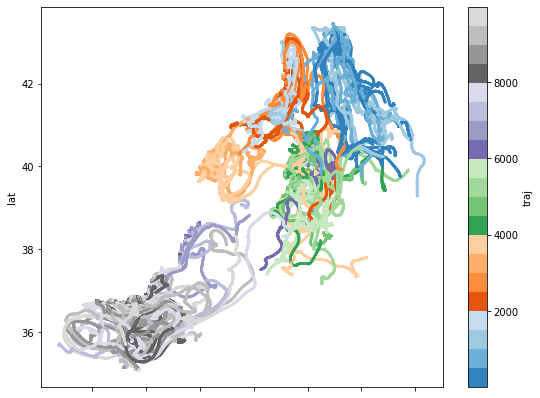

In [5]:
df_stokes.plot.scatter(
    x="lon", y="lat", s=3,
    c="traj", cmap="tab20c",
    figsize=(9, 7)
);